# What is the best classifying technique in Python's scikit-learn?

## 1. Introduction

The aim of this project is to undertake various popular classification methods which are used to predict a category of a data point within Python of a dataset, through which a comparison of techniques can be made. 

The techniques used in this project are:
* Logistic Regression
* Linear Discriminant Analysis (LDA and QDA)
* Decision Trees
* Random Forests
* Gradient Boosted Decision Trees 
* XGBoosted Decision Trees
* Support Vector Machines (SVM)
* Neural Networks

These methods will be compared using different metrics, in particular:

* **Accuracy**: models’ ability to correctly predict both classes.
* **Precision**: model’s ability to correctly detect positive classes from all predicted positive classes
* **Sensitivity (Recall)**: models’ ability to correctly detect positive classes from all actual positive classes
* **F1 Score**: weighted average of precision and recall (used for unbalanced problems).

### 1.1 Background
We are going to use techniques in the scikit-learn library for python. There is a popular cheat sheet which guides the statistician which technique best suits their dataset in order to maintain the best possible performance. 
The cheat sheet suggests using 6 of the techniques previously mentioned. It is quite often dataset-specific as to what is the best statistical technique to use and many statisticians use may techniques in order to achieve a best possible model.

### 1.2 Grid Search
In this report, for each classifying technique a "grid search" is used – also known as parameter tuning i.e. trying many different parameters for each statistical technique and using the parameters for that technique that yield the best accuracy. Parameters selected for the grid search are kept as equal as possible amongst the models in order to produce a fair comparison.

Accuracy is used to select the best parameters in the grid search since this is a balanced problem and there is no justification to favour the detection of positive cases or negative (in some medical studies this can be the case). 


## 2. The Data
The data set consists of simulated data on high energy gamma particles in an atmospheric Cherenkov telescope, extracted from extracted from the [MAGIC Gamma Telescope data set](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope).

 As particles pass through the telescope, a shower of electromagnetic radiation is produced, which are approximated by elliptical shapes. The goal is to distinguish the showers which arise from gamma particles from those which come from hadrons.
The data has 11 columns, 10 continuous variables in the first 10 columns, and a class label, g or h, in the final column.

The data is balanced and therefore the Accuracy statistic can be used to judge the performance of the statistical technique.


### 2.1 Preparation
The data doesn’t contain any missing values and is a balance dataset. Each variable is normalised, making it’s mean and standard variance equal to 0 and 1 respectively. This is necessary to do for a neural network and a support vector machine but for consistency the standardised variables are used for all techniques.  

A dataframe is created which only includes the “class” variable – whether it’s a gamma or hadron particle (what we’re trying to classify).
Another dataframe is created including all the standardised predictor variables. 

Each of the dataframes’ rows are randomly split by a 75:25 ratio, forming train and test datasets respectively. The analysis will be carried out using the train datasets and evaluated using the test datasets. 

## 3. Analysis

### 3.1 Results

The table below shows how each classifying technique performed across each performance metric. Red cells indicate relatively poor scores and green cells indicate good scores.  The last column shows which classifier performed the best and the cell in blue, the bottom-right most cell shows the classifier that has the best score averaged across all the metrics. The Neural Network model is crowned the champion here. 

<div>
<img src="tabl.png" width="800"/>
</div>
<center><i>Fig 3.1a: Table of performance measures for each classifier, with the best overall classifier in the blue cell.</i></center>


Neural Networks and SVM scored well in precision. This could be a good classifier to use then if identifying true positives is of particular interest. QDA performs quite badly and LDA along with Logistic Regression perform relatively poorly as expected due to their simple algorithms. The Decision Tree and  perform fairly well, Gradient boost and SVM perform better and Random Forests, XGBoosts and Neural Networks perform really well. 

Why QDA performs so poorly can be explained by the fact it overfits the data by allowing for a non-linear quadratic decision boundary. However, the results are extremely poor in contrast with the other methods that perhaps isn't fully explained by overfitting, especially since the accuracy on the trained data wasn't good. This is a good example that supports the often used strategy by statisticians of running the data through different algorithms to allow for quirks such as this. 

The tree methods perform better than the decision boundary methods (Logistic, LDA, QDA) by bisecting the space of data points into smaller and smaller sections, allowing for complex relationships.

Random Forests (Gradient Boosted and XGBoost)  build on decision trees  by producing many decision trees thereby limiting overfitting and the error, and we see they perform better. 

SVM performs well with it's complex algorithm and non-linear decision boundary allowing for complex relationships.

Neural Networks performs the best, again allowing for complex non-linear relationships and using the extremely effective backpropagation algorithm. 

Shown below are the confusion matrices for all the models. Highlighted in red is the Neural Network confusion matrix which performs the best. These show the percentage of the data correctly predicted (top left and bottom right) and the percentage incorrectly predicted (top right and bottom left).  

<div>
<img src="confusion.png" width="9000"/>
</div>
<center><i>Fig 3.1b: Confusion matrices for each classifier. The red box highlights the best classifier, the Neural Network. Notice the deep purple colours contrasted with the almost white other cuadrants. This contrast demonstrates the accuracy of the Neural Network.</i></center>

### 3.2 Learnings
This analysis brought up some interesting traits and goes some way to answer why a random forest might be a good option to use when classifying a data point - and that trait lies in the nature of the grid search.

One of the problems with grid search is the time it takes to carry out the amount of models which correspond to the combinations of parameters entered in by the user to the grid search. In this particular report, the initial grid search for the Gradient Boost model failed to complete after being ran for 18 hours. That meant reducive the number of paramters selected for the more complicated, computationally expensive classifiers so that the grid search wouldn't take as long to get results. 

This reduction of the amount of parameters was carried out with Gradient Boost, XGBoost, SVM and Neural Network classifiers. However it was not carried out with the rest.

The relatively moderately complicated Random Forest was allowed to run with a good amount of parameters - and this took 1 hour to run. 

The accuracy of Neural Network is highly dependent on the number of epochs (cycle through the training set) selected. Changing the number of epochs in the grid search increases the time required to run, but in what was observed to be a predictable fashion (unlike changing the number of parameters of Gradient Boost which would increase the running time exponentially in the literary sense). For example, changing the epochs from 5 to 500 increased the running time from 2 minutes to 90 minutes; increasing the accurady from 0.82 to 0.87. That increase is worth waiting for. 

For that reason Neural Networks offers a way to fine tune the complexity without the fear of the grid search taking a lot of time.

The conclusions here would be, if a statistician is concerned with running time of the grid search, the Random Forest and Neural Network offers a good balance between complexity of the algorithm  and speed. In particular the Random Forest classifier is allowed to experiment with many more parameters in a short space of time.

All these higher scoring classifiers however come at a price - interpretability. Logistic Regression is a highly interpretable model whereas the other models are a bit of a "black box", especially SVM and Neural Network. A Random Forest  can be explained with difficulity to the layman, but a Neural Network and SVM are nigh on impossible. If interpretability is paramount, a Random Forest might serve the user better in this case.

### 3.3 Weaknesses

The main weakness of this report as mentioned before is time. Some of the parameters of the grid search had to be reduced in order to produce the results in a timely fashion. This has real world applications as often results are needed quite quickly. 

An improvement here could be running the mode with many parameters, or perhaps using a random parameters search, not on a local computer but on a server. This means the code would run on powerful hardware without interruption allowing for more parameters to be used without demanding as much time.

## 4. Conclusion

To conclude this report, a PCA of the different models is carried out - allowing us to see how the models perform differently across the metrics.

### 4.1 PCA results tables

Below is a table of the loading scores for the metrics:

|     | Accuracy  | Precision | Recall    | F1 Score  |
|-----|-----------|-----------|-----------|-----------|
| PC1 | -0.555847 | -0.337699 | -0.52722  | -0.546838 |
| PC2 | -0.007286 | 0.90922   | -0.362511 | -0.204576 |



<center><i>Fig 4.1a: PC Loadings for PC1 and PC2 for each performance measure</i></center>

Below is a table of the loading scores for each of the models:

|     | Logistic Regression | LDA       | QDA      | Random Forest | Gradient Boost | XGBoost   | SVM      | NN        | Decision Tree |
|-----|---------------------|-----------|----------|---------------|----------------|-----------|----------|-----------|---------------|
| PC1 | 1.765105            | 1.915738  | 3.420752 | -1.651047     | -0.924015      | -1.430164 | -1.26186 | -1.849758 | 0.015247      |
| PC2 | -1.445549           | -1.024678 | 1.766692 | 0.145345      | -0.302925      | 0.049933  | 0.500408 | 0.466846  | -0.156073     |

<center><i>Fig 4.1b: PC Loadings for PC1 and PC2 for each classifier</i></center>

### 4.2 PC1 vs PC2 plot
Below is a graph of PC1 vs PC2. PC1 acconts for ~ 80% of the variance, and PC2 ~ 19%.
<div>
<img src="pca.png" width="600"/>
</div>
<center><i>Fig 4.2: PC1 vs PC2 of classifier performance</i></center>

### 4.3 PCA takeaways
**PC1 - overall performance** : High score = Poor overall performance, Low Score = Good overall performance

**PC2 - precision** : High score = High precision, Low score = low precision

QDA performs poorly so it has a high PC1 but with a relatively good precision so has a high PC2. QDA was a quirk in this report and for that reason it is an outlier. 

We see LDA and Logistic Regressions together, scoring high on PC1 (poor performance) and negative on PC2 (poor precision). These algorithms produce a linear decision boundary and for that reason they are together in the plot.

Decision Tree performs fairly well and the best models clump around the left of the plot, with Neural Network being the left most point (Negative PC1 and neutral PC2 - good precision with good performance).

### 4.4 Final Conclusion
As seen from the PCA Fig 4.2 and table, fig 3.1a Neural Network performs the best here, but SVM, Random Forest and XGBoost offer powerful alternatives.

## 5.  Ammendum: MDS Analysis

### 5.1 Plot Components
Below is a pairplot of the first four components of an MDS analysis on a random sample of 100 particles (50 of each particle). 

<div>
<img src="pp.png" width="800"/>
</div>
<center><i>Fig 5.1a: Pair plot of four components of the MDS Analysis</i></center>

### 5.2 The means
Below is a table of the means of each component of each particle type - this can be seen as the difference between the centroids of each particle for the component.

|   | Particle Type | First Component | Second Component | Third Component | Fourth Component |
|---|---------------|-----------------|------------------|-----------------|------------------|
| 0 | Gamma         | -2.273044       | -4.962544        | -11.067118      | -21.298796       |
| 1 | Hadron        | 2.273044        | 4.962544         | 11.067118       | 21.298796        |

<center><i>Fig 5.2b: Means of the components of each type of particle.</i></center>


### 5.3 How many components should be chosen?
Below is a list of the explained variances of each component of the MDS analysis. There is a big drop off from the second component to the third - suggesting that only the first two components should be used.

|                    | PC1         | PC2         | PC3         | PC4         |
|--------------------|-------------|-------------|-------------|-------------|
| Explained Variance | 0.411648697 | 0.275290011 | 0.138894085 | 0.107121026 |

<center><i>Fig 5.3: Table of Eigenvalues/Explained Variance.</i></center>


### 5.4 Decision

Although 2 components seems to be sufficient, eyeballing the pairplot 5.2b, each of the components plotting against the third component produces a good separation between the points. This is backed up with the large distance between the means of the particles in the third component and also the particles distributions of the third component (Unit 3,2 of fig 5.2b).



# 6. Code

In [3]:
#Libraries needed
import warnings;
warnings.filterwarnings('ignore');

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.svm import SVC
from sklearn.manifold import MDS
import networkx as nx
#read in data
gamma=pd.read_csv('C:/Users/T430/Google Drive/00 - Masters/Machine Learning/Assignment 2/gamma(1).csv')
gamma

#define variables
features=["Length","Width","Size","Conc","Conc1","Asym", "M3Long", "M3Trans", "Alpha", "Dist"]
X=gamma[features]
y=gamma["class"]

#encode y, class group, as 0 1 array
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)

#split into training and test set and set seed


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=11)
y_train1 = y_train > 0 
#normalise data
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()


Using TensorFlow backend.


### Logistic Regression

In [ ]:
#GRID SEARCH  LOGISTIC REGRESSSION
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
lgrid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', cv=3, verbose = 0 )
lgrid_clf_acc.fit(X_train, y_train);

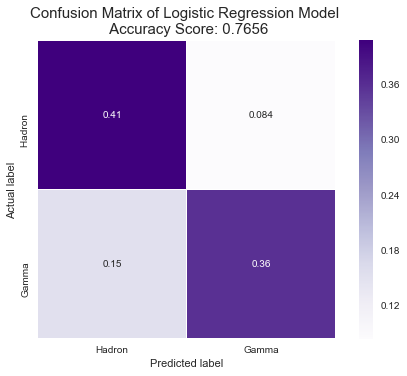

In [347]:
results = pd.DataFrame(lgrid_clf_acc.best_params_.items())
results.to_csv('log - random-grid-search-results-01.csv', index=False)

#Predict values based on new parameters
y_pred_acc = lgrid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
# print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
# print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
# print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
# print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["Logistic Regression"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#Logistic Regression (Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#ax1 = plt.subplot(221)
#plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,linewidths=.5,square=True,cmap='Purples')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of Logistic Regression Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);

ax1 = plt.subplot(222)
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=grid_clf_acc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - Logistic Regression', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
;


### Discriminant Analysis
#### LDA

In [69]:
lda = LDA()
## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003,0.01,0.1],
                 'store_covariance': (True, False)}
#gs
gsLDA = GridSearchCV(lda, param_grid = lda_param_grid, cv=3,
                     scoring="accuracy", n_jobs= 4, verbose = 0)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_;

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


Accuracy Score : 0.7616
Precision Score : 0.8217349857006673
Recall Score : 0.6782061369000787
F1 Score : 0.743103448275862


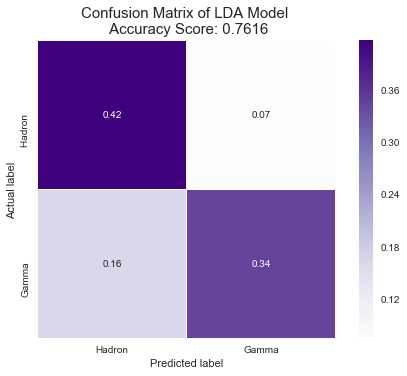

In [97]:
results = pd.DataFrame(gsLDA.best_params_.items())
results.to_csv('lda - random-grid-search-results-01.csv', index=False)

#Predict values based on new parameters
y_pred_acc = gsLDA.predict(X_test)


# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["LDA"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of LDA Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=gsLDA.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - LDA', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');


#### QDA

In [448]:
#QDA GRID SEARCH 
# Linear Discriminant Analysis - Parameter Tuning GRID SEARCH
qda = QDA()

## Search grid for optimal parameters
qda_param_grid = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1, 0.2, 0.3, 0.4, 0.5), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1, 0.2, 0.3, 0.4, 0.5), 
                   }


gsQDA = GridSearchCV(qda, param_grid = qda_param_grid, cv=3,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsQDA.fit(X_train,y_train)
QDA_best = gsQDA.best_estimator_

# Best score
gsQDA.best_score_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 110 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:    5.4s finished


0.7268

Accuracy Score : 0.7176
Precision Score : 0.8918169209431346
Recall Score : 0.5059008654602675
F1 Score : 0.6455823293172691


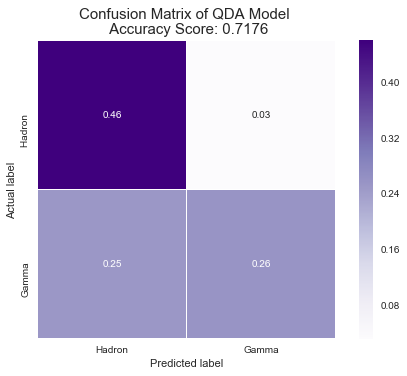

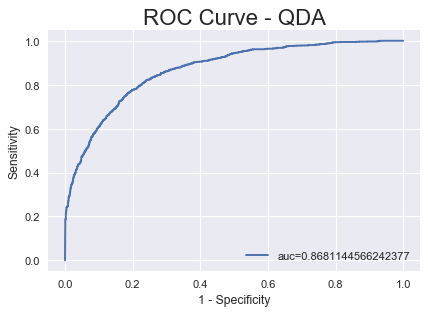

In [449]:
#
results = pd.DataFrame(gsQDA.best_params_.items())
results.to_csv('QDA-random-grid-search-results-01.csv', index=False)


#Predict values based on new parameters
y_pred_acc = gsQDA.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["QDA"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of QDA Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=gsQDA.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - QDA', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

### Decision Trees
#### Decision Tree

In [111]:
#DECISION TREE GRID SEARCH

#Grid Search
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
grid_values = {'criterion': ['gini', 'entropy'],
               'max_depth':[5, 8, 15, 25, 30],
              "min_samples_split": [2, 5, 10, 15, 100],
              "min_samples_leaf": range(1,5)}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', cv=3, verbose = 1)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   39.6s finished


Accuracy Score : 0.8144
Precision Score : 0.8712051517939282
Recall Score : 0.7450826121164438
F1 Score : 0.8032230703986429


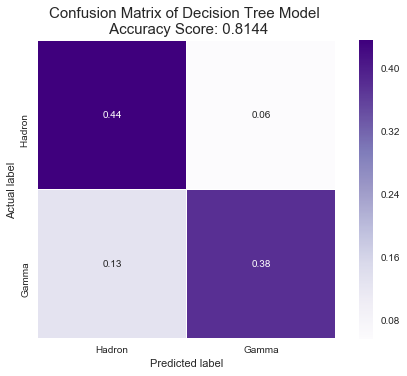

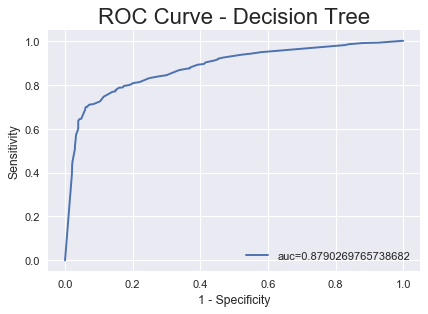

In [191]:
#
results = pd.DataFrame(grid_clf_acc.best_params_.items())
results.to_csv('DT-random-grid-search-results-01.csv', index=False)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["Decision Tree"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of Decision Tree Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=grid_clf_acc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - Decision Tree', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

#### Random Forest

In [114]:
#RANDOM FOREST GRID SEARCH
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()

grid_values = {'n_estimators': [100, 300, 500, 800, 1200],
               'max_depth':[5, 8, 15, 25, 30],
              "min_samples_split": [2, 5, 10, 15, 100],
              "min_samples_leaf": range(1,5)}

from sklearn.model_selection import GridSearchCV



gridF = GridSearchCV(rfclf, grid_values, cv = 3, verbose = 1, scoring='accuracy',
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 70.8min finished


Accuracy Score : 0.8628
Precision Score : 0.9
Recall Score : 0.8214004720692368
F1 Score : 0.8589058000822707


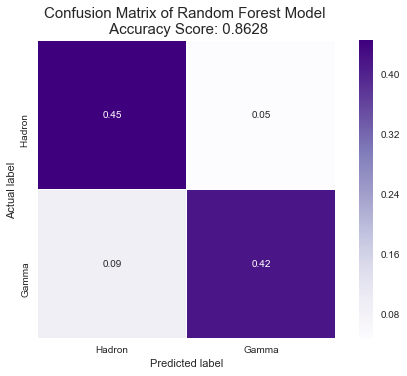

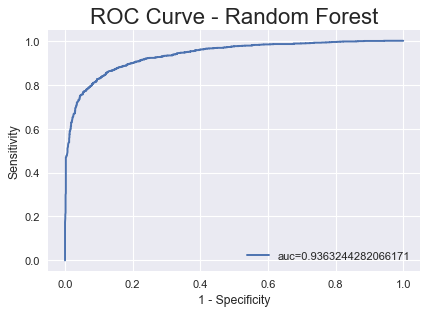

In [115]:
#
results = pd.DataFrame(gridF.best_params_.items())
results.to_csv('RF-random-grid-search-results-01.csv', index=False)

#Predict values based on new parameters
y_pred_acc = gridF.predict(X_test)


# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["Random Forest"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of Random Forest Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=gridF.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - Random Forest', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

#export data so don't have to rerun this
y_pred_proba
y_pred_acc

#### Gradient Boosting 

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.04, 0.05, 0.06],
    "min_samples_split": [5, 10, 30 ],
    "min_samples_leaf": [1,3,5],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10]
    }

gbclf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1, scoring ='accuracy' , verbose = 1)

gbclf.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 843 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 1375 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 2424 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 2916 out of 2916 | elapsed: 65.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
             iid='warn', n_jobs=-1,
             param_grid={'criter

Accuracy Score : 0.842
Precision Score : 0.8775862068965518
Recall Score : 0.8009441384736428
F1 Score : 0.8375154257507199


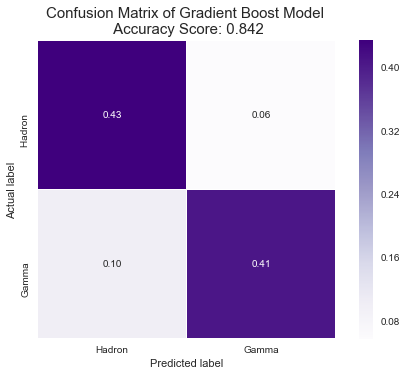

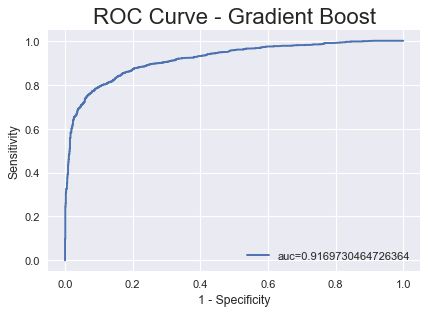

In [135]:
results = pd.DataFrame(gbclf.best_params_.items())
results.to_csv('gb-random-grid-search-results-01.csv', index=False)



#Predict values based on new parameters
y_pred_acc = gbclf.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["Gradient Boost"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of Gradient Boost Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=gbclf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - Gradient Boost', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

#### XGboost

In [138]:
# A parameter grid for XGBoost
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 2.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgbclf = GridSearchCV(XGBClassifier(), parameters, cv=3, n_jobs=-1, scoring ='accuracy', verbose = 1)

xgbclf.fit(X_train, y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 2.5, 5], 'max_depth': [3, 4, 5],
                         'min_chil

Accuracy Score : 0.8564
Precision Score : 0.8944636678200693
Recall Score : 0.8135326514555468
F1 Score : 0.8520807581376185


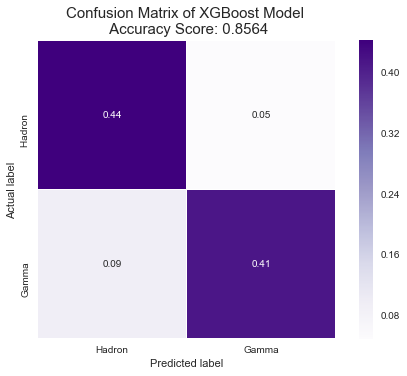

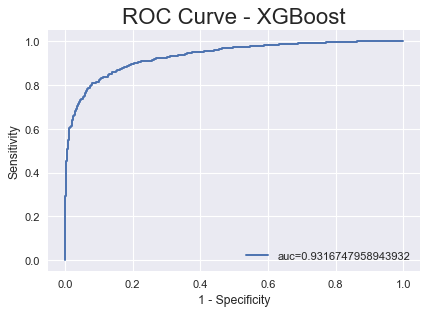

In [139]:

results = pd.DataFrame(xgbclf.best_params_.items())
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)



#Predict values based on new parameters
y_pred_acc = xgbclf.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["XGBoost"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of XGBoost Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=xgbclf.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - XGBoost', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

### Support Vector Machine

In [152]:
#SVM GRID SEARCH 
#Grid Search
clf = SVC()
grid_values = {'C':[1,100,1000],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf'], 'probability':[1]}
svc_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy', cv=3, verbose = 1)
svc_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = svc_clf_acc.predict(X_test)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

Accuracy Score : 0.8504
Precision Score : 0.9066183136899365
Recall Score : 0.7867820613690008
F1 Score : 0.8424599831508003


AttributeError: predict_proba is not available when  probability=False

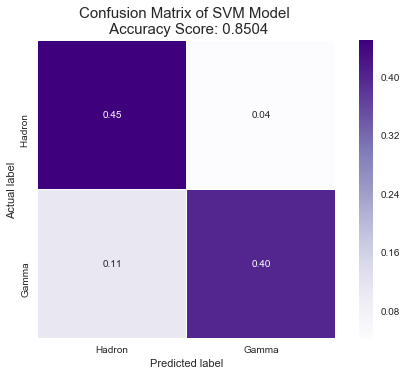

<Figure size 480x320 with 0 Axes>

In [143]:

results = pd.DataFrame(svc_clf_acc.best_params_.items())
results.to_csv('svc_clf_acc-random-grid-search-results-01.csv', index=False)


#Predict values based on new parameters
y_pred_acc = svc_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["SVM"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of SVM Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=svc_clf_acc.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - SVM', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

### Neural Network

In [245]:
#NEURAL NETWORK GRID SEARCH

n_classes = 2
Y_train = y_train
#print(X_train.shape)
input_dim = X_train.shape[1]

def create_model(dropout_rate=0.0, neurons=128, second_layer=True):
    model = Sequential()
    model.add(Dense(neurons,input_dim=input_dim))
    model.add(Dropout(dropout_rate))
    model.add(Activation('relu'))
    if second_layer:
        model.add(Dense(neurons//2,input_dim=input_dim))
        model.add(Dropout(dropout_rate))
        model.add(Activation('relu'))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

early_stopper=EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
#model = KerasClassifier(build_fn=create_model, nb_epoch=5000, batch_size=99, verbose=1)
model = KerasClassifier(build_fn=create_model,  epochs = 500, batch_size=99, verbose=1)

# # Which parameters we choose here is more a gut decision.
param_grid = dict(
    neurons=[input_dim * 2**k for k in range(1,5)],
    dropout_rate=[0.0, 0.2, 0.4, 0.6, 0.8],
    second_layer=[True, False],
    )

# # When running locally, which n_jobs setting is faster depends on the backend, openmp support, number of processors etc.
gridNN = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=1, 
                    #scoring='neg_log_loss',
                    scoring = 'accuracy',
                    cv=3)

gridNN.fit(X_train, y_train)

# Here's the result

#results = pd.DataFrame(gridNN.best_params_.items())
#results.to_csv('gridNN-random-grid-search-results-01.csv', index=False)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 91.9min finished


Epoch 1/500
7500/7500 [==============================] - 1s 80us/step - loss: 0.5384 - accuracy: 0.7245
Epoch 2/500
7500/7500 [==============================] - 0s 32us/step - loss: 0.4597 - accuracy: 0.7784
Epoch 3/500
7500/7500 [==============================] - 0s 32us/step - loss: 0.4406 - accuracy: 0.7936
Epoch 4/500
7500/7500 [==============================] - 0s 31us/step - loss: 0.4279 - accuracy: 0.8040
Epoch 5/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.4202 - accuracy: 0.8105
Epoch 6/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.4122 - accuracy: 0.8117
Epoch 7/500
7500/7500 [==============================] - 0s 33us/step - loss: 0.4095 - accuracy: 0.8120
Epoch 8/500
7500/7500 [==============================] - 0s 33us/step - loss: 0.4061 - accuracy: 0.8204
Epoch 9/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.4074 - accuracy: 0.8207
Epoch 10/500
7500/7500 [==============================] - 0s 34u

7500/7500 [==============================] - 0s 34us/step - loss: 0.3494 - accuracy: 0.8472
Epoch 156/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3476 - accuracy: 0.8488
Epoch 157/500
7500/7500 [==============================] - 0s 32us/step - loss: 0.3499 - accuracy: 0.8496
Epoch 158/500
7500/7500 [==============================] - 0s 32us/step - loss: 0.3494 - accuracy: 0.8464
Epoch 159/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3480 - accuracy: 0.8477
Epoch 160/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3487 - accuracy: 0.8523
Epoch 161/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3444 - accuracy: 0.8457
Epoch 162/500
7500/7500 [==============================] - 0s 33us/step - loss: 0.3426 - accuracy: 0.8468
Epoch 163/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3453 - accuracy: 0.8492
Epoch 164/500
7500/7500 [==============================] - 0

7500/7500 [==============================] - 0s 34us/step - loss: 0.3326 - accuracy: 0.8523
Epoch 309/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3404 - accuracy: 0.8531
Epoch 310/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3363 - accuracy: 0.8561
Epoch 311/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3353 - accuracy: 0.8544
Epoch 312/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3370 - accuracy: 0.8529
Epoch 313/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3397 - accuracy: 0.8517
Epoch 314/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3329 - accuracy: 0.8571
Epoch 315/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3381 - accuracy: 0.8513
Epoch 316/500
7500/7500 [==============================] - 0s 33us/step - loss: 0.3358 - accuracy: 0.8533
Epoch 317/500
7500/7500 [==============================] - 0

7500/7500 [==============================] - 0s 32us/step - loss: 0.3261 - accuracy: 0.8601
Epoch 461/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3252 - accuracy: 0.8591
Epoch 462/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3242 - accuracy: 0.8624
Epoch 463/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3253 - accuracy: 0.8619
Epoch 464/500
7500/7500 [==============================] - 0s 31us/step - loss: 0.3205 - accuracy: 0.8616
Epoch 465/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3244 - accuracy: 0.8587
Epoch 466/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3193 - accuracy: 0.8596
Epoch 467/500
7500/7500 [==============================] - 0s 35us/step - loss: 0.3233 - accuracy: 0.8592
Epoch 468/500
7500/7500 [==============================] - 0s 34us/step - loss: 0.3251 - accuracy: 0.8591
Epoch 469/500
7500/7500 [==============================] - E

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000189E0391508>,
             iid='warn', n_jobs=-1,
             param_grid={'dropout_rate': [0.0, 0.2, 0.4, 0.6, 0.8],
                         'neurons': [20, 40, 80, 160],
                         'second_layer': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [149]:
##need to do nn dependent on the best estimator
gridNN

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000189DBE45308>,
             iid='warn', n_jobs=-1,
             param_grid={'dropout_rate': [0.0, 0.2, 0.4, 0.6, 0.8],
                         'neurons': [20, 40, 80, 160],
                         'second_layer': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

2500/2500 [==============================] - 0s 45us/step
Accuracy Score : 0.868
Precision Score : 0.9123575810692375
Recall Score : 0.8190401258851299
F1 Score : 0.8631840796019901
2500/2500 [==============================] - 0s 12us/step


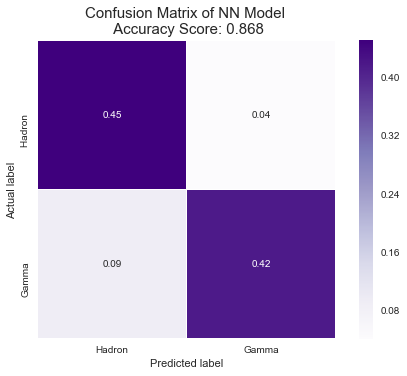

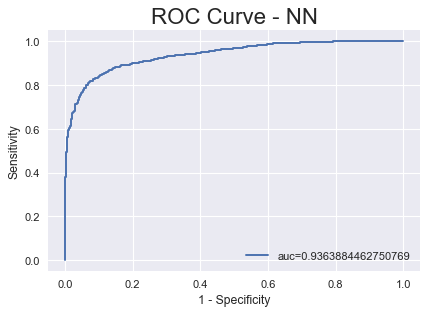

In [246]:

results = pd.DataFrame(gridNN.best_params_.items())
results.to_csv('NN - random-grid-search-results-01.csv', index=False)


#Predict values based on new parameters
y_pred_acc = gridNN.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#create table and add results to it
#models_scores_table = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table["NN"] =    np.array([accuracy_score(y_test,y_pred_acc),precision_score(y_test,y_pred_acc),recall_score(y_test,y_pred_acc),f1_score(y_test,y_pred_acc)])
#(Grid Search) Confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred_acc)/cm.sum()
cm1 = cm/cm.sum()

score = metrics.accuracy_score(y_test,y_pred_acc)
#Plot this

fig, ax = plt.subplots(1)
#plt.figure(figsize=(6,6))
sns.heatmap(cm1,annot=True,linewidths=.5,square=True,cmap='Purples'
            , fmt='.2f'
           )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Confusion Matrix of NN Model \n Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)
ax.set_ylim(2, -0.0)
ax.xaxis.set_ticklabels(['Hadron', 'Gamma']); ax.yaxis.set_ticklabels(['Hadron ', 'Gamma']);


figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
y_pred_proba=gridNN.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve - NN', size = 20)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity');

In [285]:
models_scores_table

,Logistic Regression,LDA,QDA,Random Forest,Gradient Boost,XGBoost,SVM,NN,Decision Tree
Accuracy,0.765600,0.761600,0.717600,0.862800,0.842000,0.856400,0.850400,0.868000,0.814400
Precision,0.810517,0.821735,0.891817,0.900000,0.877586,0.894464,0.906618,0.912358,0.871205
Recall,0.703383,0.678206,0.505901,0.821400,0.800944,0.813533,0.786782,0.819040,0.745083
F1 Score,0.753159,0.743103,0.645582,0.858906,0.837515,0.852081,0.842460,0.863184,0.803223


In [251]:
models_scores_tableT = models_scores_table.transpose()
models_scores_tableT

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.7656,0.810517,0.703383,0.753159
LDA,0.7616,0.821735,0.678206,0.743103
QDA,0.7176,0.891817,0.505901,0.645582
Random Forest,0.8628,0.900000,0.821400,0.858906
Gradient Boost,0.8420,0.877586,0.800944,0.837515
XGBoost,0.8564,0.894464,0.813533,0.852081
SVM,0.8504,0.906618,0.786782,0.842460
NN,0.8680,0.912358,0.819040,0.863184
Decision Tree,0.8144,0.871205,0.745083,0.803223


In [252]:
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(models_scores_tableT)
models_scores_table1=scaler.transform(models_scores_tableT)
pca=PCA()
pca.fit(models_scores_table1);

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [253]:
np.cumsum(pca.explained_variance_ratio_);

array([0.80906791, 0.9998699 , 0.99998932, 1.        ])

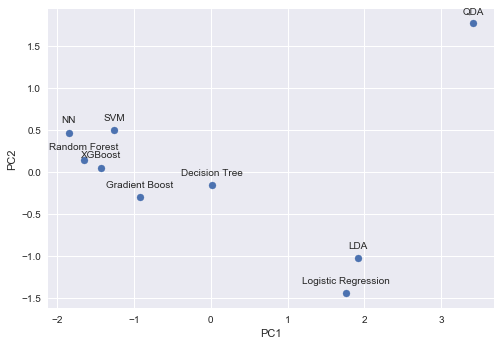

In [284]:
p=pca.fit_transform(models_scores_table1)
y = [1, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

plt.scatter(x=p[:,0],y=p[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
# for i, txt in enumerate(models_scores_table.columns):
#     ax.annotate(txt, (p[:,0][i], p[:,1][i]))
for i in range(len(models_scores_table.columns)):
    plt.annotate(models_scores_table.columns[i], # this is the text
                 (p[:,0][i], p[:,1][i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [280]:
enumerate(models_scores_table.columns);

In [263]:
pca=PCA(n_components=2)
p = pca.fit_transform(models_scores_table1)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=models_scores_tableT.columns)
loadings

,PC1,PC2
Accuracy,-0.555847,-0.007286
Precision,-0.337699,0.909220
Recall,-0.527220,-0.362511
F1 Score,-0.546838,-0.204576


In [390]:
#pd.DataFrame(p, columns=['PC1', 'PC2'], index=models_scores_table.columns)

In [ ]:
#mds code

#random sample of 50 rows from each grp
gamma_sample = gamma.groupby('class').apply(pd.DataFrame.sample, n=50, random_state=1).reset_index(drop=True)
#define variables
features=["Length","Width","Size","Conc","Conc1","Asym", "M3Long", "M3Trans", "Alpha", "Dist"]
X=gamma_sample[features]
y=gamma_sample["class"]

#encode y, class group, as 0 1 array
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
label_encoder=enc.fit(y)
y=label_encoder.transform(y)


mds=MDS(n_components=4,dissimilarity="euclidean")
x_mds=mds.fit_transform(X)
distancepd = pd.DataFrame({
    'First Component': x_mds[:,0],
    'Second Component': x_mds[:,1],
    'Third Component': x_mds[:,2],
#     'Fourth Component': x_mds[:,3],
#     'Fidth Component': x_mds[:,4],
    })
dataset = pd.DataFrame({'First Component': x_mds[:,0], 'Second Component': x_mds[:,1],
                        'Third Component': x_mds[:,2],
                        'Fourth Component': x_mds[:,3],
                        'Particle': y})
def transconum(Particle):
    if (Particle == 0):
        return 'Gamma'
    else:
        return 'Hadron'

dataset['Particle Type'] = dataset['Particle'].apply(transconum)
dataset = dataset.drop(columns=['Particle'])

#g= sns.pairplot(data=dataset, hue="Particle Type", size=2, diag_kind='kde', palette="coolwarm")


#create distance matrix and get eiganvalues
import sklearn.metrics.pairwise as smp

distHD = smp.euclidean_distances(X) #L1 Distance Function
import numpy.linalg as la
import pandas as pd
# square it
A = distHD**2

# centering matrix
n = A.shape[0]
J_c = 1./n*(np.eye(n) - 1 + (n-1)*np.eye(n))

# perform double centering
B = -0.5*(J_c.dot(A)).dot(J_c)

# find eigenvalues and eigenvectors
eigen_val = la.eig(B)[0]
eigen_vec = la.eig(B)[1].T

# select top 2 dimensions (for example)
PC1 = np.sqrt(eigen_val[0])*eigen_vec[0]
PC2 = np.sqrt(eigen_val[1])*eigen_vec[1]

pc1_exv = eigen_val[0]/sum(eigen_val)
pc2_exv = eigen_val[1]/sum(eigen_val)
pc3_exv = eigen_val[2]/sum(eigen_val)
pc4_exv = eigen_val[3]/sum(eigen_val)
pc5_exv = eigen_val[4]/sum(eigen_val)

#print("Explained Variance of PC1 =", float(pc1_exv))
#print("Explained Variance of PC2 =", float(pc2_exv))
#print("Explained Variance of PC3 =", float(pc3_exv))
#print("Explained Variance of PC4 =", float(pc4_exv))

dataset.groupby('Particle Type', as_index=False)[['First Component', 'Second Component', 'Third Component', 'Fourth Component']].mean()